# Exercises

1. What is the fundamental idea behind support vector machines?
2. What is a support vector?
3. Why is it important to scale the inputs when using SVMs?
4. Can a SVM classifier output a confidence score when it classifies an instance? What about a probability?
5. Should you use the primal or dual form of the SVM problem to train a model on a training set with millions of instances & hundred of features?
6. Say you trained an SVM classifier with an RBF kernel. it seems to underfit the training set: should you increase or decrease $\gamma$ (`gamma`)? What about `C`?
7. How should you set the QP parameters ($H$, $f$, $A$, & $b$) to solve the soft margin linear SVM classifier problem using an off-the-shelf QP solver?
8. Train a `LinearSVC` on a linearly separable dataset. Then train an `SVC` & a `SGDClassifer` on the same dataset. See if you can get them to produce roughly the same model.
9. Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. you may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?
10. Train an SVM regressor on the California housing dataset.

---

1. For SVM classification, you want to find the best parameters for the decision function that defines the hyperplane that maximises the distance between it & its support vectors (maximise the margin), while minimising the number of instances that exist between the hyperplane & its support vectors (minimising the amount of margin violation). For SVM regression, its the opposite. You want to increase the number of instances between the support vectors & minimise the number of instances outside of it.
2. Support vectors are the instances that lie on or within the margin. They are used to define the decision boundary. Instances outside of the margin-violation line do not affect the decision boundary. Computing the predictions only involve the support vectors, not all instances.
3. Support vectors machines are sensitive to feature scales, so to improve the model performance (larger margin, less margin violation) & speed, we scale the inputs. This ensures that each feature will have equal weight when building the model.
4. Not sure what "confidence score" means in this question, but you can output the distance between an instance & the decision boundary. SVM classifiers cannot output probabilities.
5. The dual form of the SVM problem is faster to solve than the primal when the number of training instances is smaller than the number of features.
6. You should increase gamma if your classifier is underfit. Same applies with C.
7. For a hard margin linear SVM classifier, the QP parameters are defined as:
   * $n_p = n + 1$, where $n$ is the number of features (+1 for the bias term)
   * $n_c = m$, where m is the number of training instances
   * $H$ is the $n_p * n_p$ identity matrix, except with a zero in the top-left cell (to ignore the bias term)
   * $f = 0$, an $n_p$ dimensional vector full of 0s
   * $b = -1$, an $n_c$ dimensional vector full of -1s
   * $a^{(i)} = -t^{(i)}x^{(i)}$, where $x^{(i)}$ is equal to $x^{(i)}$ with an extra bias feature $x_0 = 1$
   
   For soft margin linear SVM classifier, the QP parameters have $m$ additional parameters & $m$ additional constraints, so:
   * $n_p = n + 1 + m$
   * $n_c = 2m$
   * $H$ is an $n_p * n_p$ identity matrix, plus $m$ columns of 0s on the right & $m$ rows of 0s at the bottom.
   * $f$ is an $n_p$ dimensional vector with $m$ additional elements, all equal to the value of hyperparameter C
   * $b$ is an $n_c$ dimensional vector with $m$ additional elements, all equal to 0
   * $a = -tx$ with an extra $m * m$ identity matrix to the right & another below the said identity matrix, while the rest is filled with 0.

# 8.

In [2]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]
X = X[(y == 1)|(y == 2)]
y = y[(y == 1)|(y == 2)]
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 32)

for train_indices, test_indices in sss.split(X, y):
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
X_train

array([[3.5, 1. ],
       [4.7, 1.6],
       [5. , 1.5],
       [4.1, 1.3],
       [4.5, 1.5],
       [4.7, 1.4],
       [4.9, 1.8],
       [4.6, 1.5],
       [3.5, 1. ],
       [4.6, 1.4],
       [5.6, 2.2],
       [5.1, 1.5],
       [4.7, 1.4],
       [4.9, 1.5],
       [4. , 1.3],
       [4. , 1.3],
       [4.9, 1.8],
       [4.5, 1.5],
       [4.5, 1.5],
       [4.2, 1.2],
       [6.7, 2. ],
       [6.9, 2.3],
       [3. , 1.1],
       [6.1, 2.3],
       [5.6, 1.8],
       [5.2, 2.3],
       [3.8, 1.1],
       [5. , 1.9],
       [4.9, 1.5],
       [5.5, 1.8],
       [4.6, 1.3],
       [5.6, 2.4],
       [4.2, 1.3],
       [4.7, 1.5],
       [5.1, 2.4],
       [4.5, 1.6],
       [4.4, 1.2],
       [5. , 1.7],
       [5.1, 1.6],
       [6.3, 1.8],
       [6.7, 2.2],
       [4.3, 1.3],
       [5.7, 2.1],
       [6.1, 2.5],
       [4.8, 1.8],
       [5.8, 1.8],
       [5. , 2. ],
       [4. , 1. ],
       [5.4, 2.1],
       [4.4, 1.4],
       [4.2, 1.5],
       [5.4, 2.3],
       [6.6,

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_prepared = scaler.fit_transform(X_train)
X_test_prepared = scaler.fit_transform(X_test)
X_train_prepared

array([[-1.74951221, -1.66882611],
       [-0.28650548, -0.22291179],
       [ 0.0792462 , -0.46389751],
       [-1.01800885, -0.94586895],
       [-0.53033994, -0.46389751],
       [-0.28650548, -0.70488323],
       [-0.04267103,  0.25905965],
       [-0.40842271, -0.46389751],
       [-1.74951221, -1.66882611],
       [-0.40842271, -0.70488323],
       [ 0.81074956,  1.22300253],
       [ 0.20116343, -0.46389751],
       [-0.28650548, -0.70488323],
       [-0.04267103, -0.46389751],
       [-1.13992608, -0.94586895],
       [-1.13992608, -0.94586895],
       [-0.04267103,  0.25905965],
       [-0.53033994, -0.46389751],
       [-0.53033994, -0.46389751],
       [-0.89609162, -1.18685467],
       [ 2.15183906,  0.74103109],
       [ 2.39567352,  1.46398825],
       [-2.35909835, -1.42784039],
       [ 1.4203357 ,  1.46398825],
       [ 0.81074956,  0.25905965],
       [ 0.32308065,  1.46398825],
       [-1.38376053, -1.42784039],
       [ 0.0792462 ,  0.50004537],
       [-0.04267103,

In [4]:
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV

svc_class = SVC()
svc_param_space = [{"kernel":["linear"], "C":[1, 3, 5, 7, 9], "tol":[1e-5]}]
svc_grid_search = GridSearchCV(svc_class, svc_param_space, scoring = "accuracy", 
                               cv = 10, return_train_score = True)
svc_grid_search.fit(X_train_prepared, y_train)
svc_grid_search.best_params_

{'C': 1, 'kernel': 'linear', 'tol': 1e-05}

In [5]:
linear_svc_class = LinearSVC()
linear_svc_param_space = [{"penalty":["l2"], "loss":["hinge"], "C":[1, 3, 5, 7, 9], 
                           "max_iter":[2000], "tol":[1e-5]}]
linear_svc_grid_search = GridSearchCV(linear_svc_class, linear_svc_param_space, scoring = "accuracy", 
                                      cv = 10, return_train_score = True)
linear_svc_grid_search.fit(X_train_prepared, y_train)
linear_svc_grid_search.best_params_

{'C': 1, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l2', 'tol': 1e-05}

In [6]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier()
sgd_classifier_param_space = [{"loss":["hinge"], "penalty":["l2"], "alpha":[1e-3, 2e-3, 3e-3, 4e-3, 5e-3], 
                               "tol":[1e-5], "max_iter":[2000]}]
sgd_classifier_grid_search = GridSearchCV(sgd_classifier, sgd_classifier_param_space,
                                          scoring = "accuracy", cv = 10, return_train_score = True)
sgd_classifier_grid_search.fit(X_train_prepared, y_train)
sgd_classifier_grid_search.best_params_

{'alpha': 0.002,
 'loss': 'hinge',
 'max_iter': 2000,
 'penalty': 'l2',
 'tol': 1e-05}

In [7]:
svc = SVC(**svc_grid_search.best_params_)
svc.fit(X_train_prepared, y_train)
linear_svc = LinearSVC(**linear_svc_grid_search.best_params_)
linear_svc.fit(X_train_prepared, y_train)
sgd = SGDClassifier(**sgd_classifier_grid_search.best_params_)
sgd.fit(X_train_prepared, y_train)

print("SVC: ", svc.intercept_, svc.coef_)
print("LinearSVC: ", linear_svc.intercept_, linear_svc.coef_)
print("SGDClassifier: ", sgd.intercept_, sgd.coef_)

SVC:  [0.05429815] [[0.67495048 1.85584341]]
LinearSVC:  [0.05216752] [[0.68122835 1.84737517]]
SGDClassifier:  [0.24453789] [[1.06502379 3.05248502]]


In [8]:
# Calculate slope & intercepts for each decision boundary.
svc_slope = -svc.coef_[0, 0]/svc.coef_[0, 1]
svc_int = -svc.intercept_[0]/svc.coef_[0, 1]
linear_svc_slope = -linear_svc.coef_[0, 0]/linear_svc.coef_[0, 1]
linear_svc_int = -linear_svc.intercept_[0]/linear_svc.coef_[0, 1]
sgd_slope = -sgd.coef_[0, 0]/sgd.coef_[0, 1]
sgd_int = -sgd.intercept_[0]/sgd.coef_[0, 1]

In [9]:
# Revert decision boundary lines to their original scales.
svc_line = scaler.inverse_transform([[-10, -10 * svc_slope + svc_int], 
                                     [10, 10 * svc_slope + svc_int]])
linear_svc_line = scaler.inverse_transform([[-10, -10 * linear_svc_slope + linear_svc_int],
                                            [10, 10 * linear_svc_slope + linear_svc_int]])
sgd_line = scaler.inverse_transform([[-10, -10 * sgd_slope + sgd_int],
                                     [10, 10 * sgd_slope + sgd_int]])

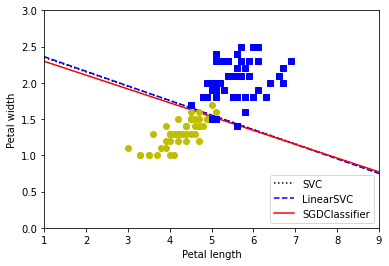

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt


# Plot the decision boundaries.
plt.plot(svc_line[:, 0], svc_line[:, 1], "k:", label = "SVC")
plt.plot(linear_svc_line[:, 0], linear_svc_line[:, 1], "b--", label = "LinearSVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label = "SGDClassifier")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "yo") # Iris versicolour
plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "bs") # Iris virginica
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc = "lower right")
plt.axis([1, 9, 0, 3])
plt.show()

The models seem close enough.

---

# 9.

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

mnist = fetch_openml("mnist_784", version = 1, as_frame = False)
mnist.keys()
X, y = mnist["data"].astype(np.intc), mnist["target"].astype(np.intc)

strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 32)
for train_index, test_index in strat_split.split(X, y):
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
X_train

/Users/jiehengyu/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = Pipeline([("scaler", StandardScaler())])
X_train_prepared = scaler.fit_transform(X_train)
X_test_prepared = scaler.fit_transform(X_test)
X_train_prepared

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

sgd_classifier = SGDClassifier()
param_search_space = [{"alpha":[1e-3, 2e-3, 3e-3], "max_iter":[5000], "tol":[1e-4], "n_jobs":[6]}]
grid_search = GridSearchCV(sgd_classifier, param_search_space, cv = 3, 
                           scoring = "accuracy", return_train_score = True)
grid_search.fit(X_train_prepared, y_train)
grid_search.best_params_

{'alpha': 0.001, 'max_iter': 5000, 'n_jobs': 6, 'tol': 0.0001}

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(SGDClassifier(**grid_search.best_params_), X_train_prepared, y_train, 
                scoring = "accuracy", cv = 3, n_jobs = 6)

In [8]:
from sklearn.metrics import accuracy_score

sgd_classifier = SGDClassifier(**grid_search.best_params_)
sgd_classifier.fit(X_train_prepared, y_train)
sgd_pred = sgd_classifier.predict(X_test_prepared)
print(f"Accuracy: {accuracy_score(y_test, sgd_pred)}")

Accuracy: 0.9085


---

# 10.